#### 1. 파일 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc 
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name() 
rc('font', family=font_name)

In [2]:
df = pd.read_csv('c:/Bankruptcy/data/bankruptcy_cl.csv', index_col=0)
df.head() 

,cnt,kospi,usd,cny,jpy,call,cd,bond,unemp,p_pi,...,bill_4,bill_6,bill_7,rsn_1,rsn_2,rsn_3,rsn_4,rsn_5,rsn_6,amt_class
ym,,,,,,,,,,,,,,,,,,,,,
201808,2,2322.88,1108.8,162.29,998.65,3.425,3.61,3.452,4.0,104.32,...,0,0,0,1,0,0,0,0,0,0
201808,3,2322.88,1108.8,162.29,998.65,3.425,3.61,3.452,4.0,104.32,...,0,0,0,0,1,0,0,0,0,0
201808,2,2322.88,1108.8,162.29,998.65,3.425,3.61,3.452,4.0,104.32,...,0,0,0,0,0,1,0,0,0,0
201808,1,2322.88,1108.8,162.29,998.65,3.425,3.61,3.452,4.0,104.32,...,0,0,0,0,0,0,1,0,0,0
201808,3,2322.88,1108.8,162.29,998.65,3.425,3.61,3.452,4.0,104.32,...,0,0,0,0,0,0,0,0,1,0


In [3]:
df.groupby("amt_class").mean() 

,cnt,kospi,usd,cny,jpy,call,cd,bond,unemp,p_pi,...,bill_3,bill_4,bill_6,bill_7,rsn_1,rsn_2,rsn_3,rsn_4,rsn_5,rsn_6
amt_class,,,,,,,,,,,,,,,,,,,,,
0,6.243086,2362.449101,1181.915558,173.433855,1047.497623,1.487823,1.774323,1.794844,3.625330,107.046748,...,0.159835,0.121827,0.111757,0.285066,0.248334,0.314991,0.003546,0.192171,0.013899,0.227060
1,55.404230,2396.425993,1190.173325,174.850435,1037.693608,1.527751,1.803690,1.800824,3.577086,108.190517,...,0.000000,0.004700,0.287897,0.586369,0.229142,0.561692,0.000000,0.012926,0.001175,0.195065


In [4]:
print(df['amt_class'].value_counts())

0    7051
1     851
Name: amt_class, dtype: int64


#### 2. 언더샘플링/ 종속,독립변수/ 학습용,검증용 분리 

In [5]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler 
train_cols = df.columns[0:34] 
X = df[train_cols]  
y = df["amt_class"]
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['amt_class'])
df1=pd.concat([X_samp,y_samp],axis=1)
df1["amt_class"].value_counts()

0    851
1    851
Name: amt_class, dtype: int64

In [6]:
#독립변수 / 종속 변수
X=df1[train_cols]
y=df1["amt_class"]

#### 3. Logit (로지스틱회귀분석)

In [7]:
import statsmodels.api as sm
model=sm.Logit(y,X)
result=model.fit()
print(result.summary2())

         Current function value: 0.294822
         Iterations: 35


LinAlgError: Singular matrix

In [8]:
#P-value 확인
pd.options.display.float_format = '{:.5f}'.format
print(result.pvalues)

NameError: name 'result' is not defined

In [9]:
# 유효한 변수 적용 
cols = ['cnt', 'kospi','usd', 'cny', 'c_pi', 'house_pi','coloan','bill_2','rsn_2' ] 
X = df1[cols]  
y = df1["amt_class"]

In [10]:
model=sm.Logit(y,X)
result=model.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.469046
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.323      
Dependent Variable: amt_class        AIC:              1614.6340  
Date:               2023-05-03 21:12 BIC:              1663.5900  
No. Observations:   1702             Log-Likelihood:   -798.32    
Df Model:           8                LL-Null:          -1179.7    
Df Residuals:       1693             LLR p-value:      2.0945e-159
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     8.0000                                        
--------------------------------------------------------------------
            Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
--------------------------------------------------------------------
cnt         0.0709     0.0045   15.8923   0.0000    0.0622    0.0797
kospi       0.0003     0.0004    0.8950   0.3708   -0.0004    0.0010
usd         0.0074     0.0025    2.9826   0.0029    0.0026    0.0123
cny        -0.0477     0.0233   -2.0479   0.0406   -0.0933   -0.0020
c_pi       -0.1146     0.0298   -3.8455   0.0001   -0.1730   -0.0562
house_pi    0.0959     0.0205    4.6717   0.0000    0.0557    0.1362
coloan      0.1601     0.1062    1.5067   0.1319   -0.0482    0.3683
bill_2     -0.1912     0.2043   -0.9359   0.3493   -0.5915    0.2092
rsn_2       0.7042     0.1282    5.4934   0.0000    0.4530    0.9554
==================================================================

"""

In [11]:
#학습용 / 검증용 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, stratify=y,random_state=10)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model = LogisticRegression()
model.fit(X_train, y_train)
print("학습용:",model.score(X_train, y_train))
print("검증용:",model.score(X_test, y_test))

학습용: 0.8067597354886114
검증용: 0.7947214076246334


c:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### 3.1 스케일링 적용

In [13]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train))
X_test_scaled = pd.DataFrame(scaler.transform(X_test))

In [14]:
result_tr = []
result_te = []

logit = LogisticRegression(random_state=0)
logit.fit(X_train_scaled, y_train)

score_tr = logit.score(X_train_scaled, y_train)
score_te = logit.score(X_test_scaled, y_test)

print("학습용:",score_tr)
print("검증용:",score_te)

result_tr.append(score_tr)
result_te.append(score_te)

학습용: 0.8016164584864071
검증용: 0.7976539589442815


##### 3.2 ROC 커브 / Confusion_matrix 

In [15]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X, y)
y_hat = model.predict(X)  
f_value = model.decision_function(X)  
print("f_value :",f_value)
print("출력값 :",model.predict(X))

c:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


f_value : [-1.77888467 -0.65822968  0.71537285 ...  5.72253479  0.57706222
  0.36266753]
출력값 : [0 0 1 ... 1 1 1]


In [16]:
import numpy as np
import pandas as pd
df_r = pd.DataFrame(np.vstack([f_value, y_hat,y]).T,
                  columns=["f", "y_hat","y"])
df_r.sort_values("f", ascending=False).reset_index(drop=True)

,f,y_hat,y
0,39.17867,1.00000,1.00000
1,32.96593,1.00000,1.00000
2,32.40054,1.00000,1.00000
3,30.69591,1.00000,1.00000
4,29.97370,1.00000,1.00000
...,...,...,...
1697,-1.96355,0.00000,0.00000
1698,-1.96355,0.00000,1.00000
1699,-1.96355,0.00000,1.00000
1700,-1.96355,0.00000,0.00000


In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_hat,labels=[0,1])

array([[763,  88],
       [241, 610]], dtype=int64)

In [18]:
# 특이도, 민감도 산출
fpr0 = 89/(762+89) 
tpr0 = 608/(243+608)  
print("fall-out :",fpr0)
print("recall :",tpr0)

fall-out : 0.1045828437132785
recall : 0.7144535840188014


In [19]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y, model.decision_function(X))
fpr, tpr, thresholds


(array([0.        , 0.        , 0.        , 0.00117509, 0.00117509,
        0.00235018, 0.00235018, 0.00352526, 0.00352526, 0.00587544,
        0.00587544, 0.00705053, 0.00705053, 0.00940071, 0.00940071,
        0.01057579, 0.01057579, 0.01175088, 0.01175088, 0.01292597,
        0.01292597, 0.01410106, 0.01410106, 0.01410106, 0.01410106,
        0.01527615, 0.01527615, 0.01645123, 0.01645123, 0.01645123,
        0.01645123, 0.01762632, 0.01762632, 0.01880141, 0.01880141,
        0.01880141, 0.01880141, 0.01880141, 0.01880141, 0.0199765 ,
        0.0199765 , 0.02115159, 0.02115159, 0.02350176, 0.02350176,
        0.02350176, 0.02350176, 0.02585194, 0.02585194, 0.02585194,
        0.02585194, 0.02702703, 0.02702703, 0.02820212, 0.02820212,
        0.0293772 , 0.0293772 , 0.03055229, 0.03055229, 0.03172738,
        0.03172738, 0.03290247, 0.03290247, 0.03290247, 0.03407756,
        0.03407756, 0.03525264, 0.03525264, 0.03642773, 0.03642773,
        0.03760282, 0.03760282, 0.03877791, 0.03

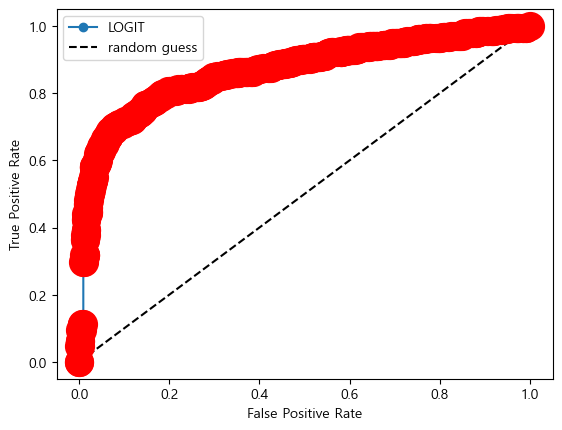

In [20]:
#ROC 커브
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, 'o-', label="LOGIT")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.plot([fpr], [tpr], 'ro', ms=20)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

##### 3.3 classification report 

In [21]:
from sklearn.metrics import accuracy_score, classification_report
pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
report =classification_report(y_test, pred)
print("Accuracy:", score)
print(report)

Accuracy: 0.8064516129032258
              precision    recall  f1-score   support

           0       0.75      0.91      0.82       170
           1       0.88      0.71      0.79       171

    accuracy                           0.81       341
   macro avg       0.82      0.81      0.80       341
weighted avg       0.82      0.81      0.80       341



#### 5. Tree 모형

In [22]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train_scaled, y_train)
print("학습용:",model.score(X_train_scaled, y_train))
print("검증용:",model.score(X_test_scaled, y_test))


학습용: 0.9346069066862601
검증용: 0.7214076246334311


In [23]:
#max_depth 가지치기
tree = DecisionTreeClassifier(max_depth=2, random_state=10)
tree.fit(X_train_scaled, y_train)
score_tr=tree.score(X_train_scaled, y_train)
score_te=tree.score(X_test_scaled, y_test)
print("학습용:",score_tr)
print("검증용:",score_te)

result_tr.append(score_tr)
result_te.append(score_te)

학습용: 0.804555473916238
검증용: 0.8152492668621701


In [24]:
#트리그래프
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
dot_data = export_graphviz(tree, out_file=None,
feature_names=cols, class_names=["0","1"], filled=True,
rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

ModuleNotFoundError: No module named 'pydotplus'

##### 5.1 ROC 커브 /Confusion_matrix 

In [25]:
from sklearn.tree import DecisionTreeClassifier 
model=DecisionTreeClassifier().fit(X,y)
y_hat=model.predict(X)
fpr,tpr,thresholds=roc_curve(y, model.predict_proba(X)[:,1])
fpr,tpr,thresholds 

(array([0.        , 0.        , 0.00117509, 0.00470035, 0.00940071,
        0.01762632, 0.0199765 , 0.02467685, 0.0787309 , 0.08813161,
        0.09165687, 0.10810811, 0.14571093, 0.15158637, 0.18683901,
        0.21504113, 0.23266745, 0.23971798, 0.2479436 , 0.26086957,
        1.        ]),
 array([0.        , 0.82491187, 0.8319624 , 0.84253819, 0.85428907,
        0.87074031, 0.87426557, 0.88014101, 0.93419506, 0.94124559,
        0.94359577, 0.95299647, 0.97179788, 0.97414806, 0.98589894,
        0.99294947, 0.99647474, 0.99764982, 0.99882491, 1.        ,
        1.        ]),
 array([2.        , 1.        , 0.85714286, 0.75      , 0.71428571,
        0.66666667, 0.6       , 0.55555556, 0.5       , 0.42857143,
        0.4       , 0.36363636, 0.33333333, 0.28571429, 0.25      ,
        0.2       , 0.16666667, 0.14285714, 0.125     , 0.08333333,
        0.        ]))

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_hat,labels=[0,1])

array([[830,  21],
       [102, 749]], dtype=int64)

In [27]:
# 특이도, 민감도 산출
fpr1 = 21/(830+21) 
tpr1 = 749/(102+749)  
print("fall-out :",fpr1)
print("recall :",tpr1)

fall-out : 0.024676850763807285
recall : 0.8801410105757932


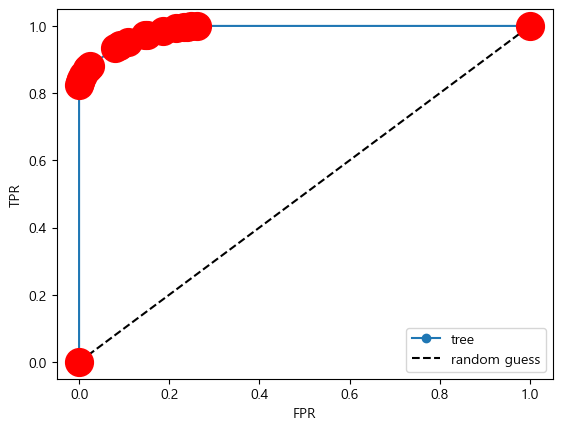

In [28]:
#ROC 커브
import matplotlib.pyplot as plt 
plt.plot(fpr, tpr, 'o-', label='tree')
plt.plot([0,1],[0,1],'k--',label='random guess')
plt.plot([fpr], [tpr], 'ro', ms=20)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

##### 5.2 classification report 

In [29]:
from sklearn.metrics import accuracy_score, classification_report
pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
report =classification_report(y_test, pred)
print("Accuracy:", score)
print(report)

Accuracy: 0.9266862170087976
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       170
           1       0.99      0.86      0.92       171

    accuracy                           0.93       341
   macro avg       0.93      0.93      0.93       341
weighted avg       0.93      0.93      0.93       341



#### 5.3 교차검증

In [30]:
# 최적 요인 탐색
from sklearn.model_selection import GridSearchCV
params ={
    'max_depth': list(range(1, 11)),
    'criterion': ['gini','entropy'],
    'max_leaf_nodes': list(range(2, 11)),
    'min_samples_split': [2, 3, 4]
}
gcv = GridSearchCV(tree, params, cv=3)
gcv.fit(X,y)


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(max_depth=2, random_state=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4]})

In [31]:
gcv.cv_results_["params"][:5]

[{'criterion': 'gini',
  'max_depth': 1,
  'max_leaf_nodes': 2,
  'min_samples_split': 2},
 {'criterion': 'gini',
  'max_depth': 1,
  'max_leaf_nodes': 2,
  'min_samples_split': 3},
 {'criterion': 'gini',
  'max_depth': 1,
  'max_leaf_nodes': 2,
  'min_samples_split': 4},
 {'criterion': 'gini',
  'max_depth': 1,
  'max_leaf_nodes': 3,
  'min_samples_split': 2},
 {'criterion': 'gini',
  'max_depth': 1,
  'max_leaf_nodes': 3,
  'min_samples_split': 3}]

In [32]:
scores=gcv.cv_results_["mean_test_score"]
scores[:10]

array([0.79962077, 0.79962077, 0.79962077, 0.79962077, 0.79962077,
       0.79962077, 0.79962077, 0.79962077, 0.79962077, 0.79962077])

0.7996207698868106


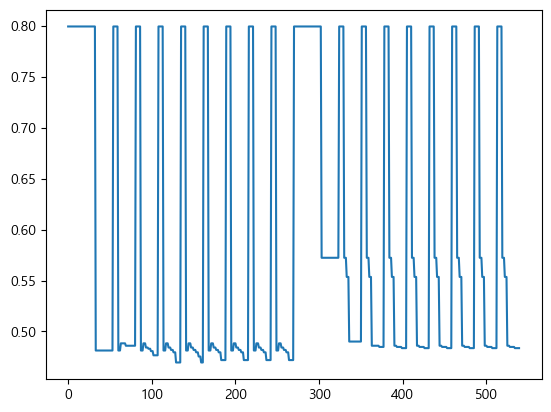

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
print(max(scores))
plt.plot(scores)

In [34]:
# 최적 요인
print(gcv.best_score_) 
print(gcv.best_params_) 
print(gcv.best_estimator_)

0.7996207698868106
{'criterion': 'gini', 'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_split': 2}
DecisionTreeClassifier(max_depth=1, max_leaf_nodes=2, random_state=10)


In [35]:
#최적 요인 적용 / 교차 검증 10회 
from sklearn.model_selection import cross_val_score
import numpy as np
tree = DecisionTreeClassifier(criterion='gini', max_depth=1,
max_leaf_nodes=2, min_samples_split=2, random_state=0)
result=cross_val_score(tree, X, y, cv=10) 
print(result)
print(np.mean(result))
print(np.max(result))

[0.86549708 0.86549708 0.81176471 0.81764706 0.81176471 0.84117647
 0.8        0.81764706 0.71764706 0.7       ]
0.8048641210870313
0.8654970760233918


#### 5.3 RF (랜덤포레스트)

In [36]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100,random_state=10,max_depth=4)
forest.fit(X_train_scaled, y_train)
score_tr=forest.score(X_train_scaled, y_train)
score_te=forest.score(X_test_scaled, y_test)
print("학습용:",score_tr)
print("검증용:",score_te)

result_tr.append(score_tr)
result_te.append(score_te)

학습용: 0.8251285819250551
검증용: 0.8181818181818182


In [37]:
from sklearn.metrics import accuracy_score, classification_report
pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
report =classification_report(y_test, pred)
print("Accuracy:", score)
print(report)

Accuracy: 0.9266862170087976
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       170
           1       0.99      0.86      0.92       171

    accuracy                           0.93       341
   macro avg       0.93      0.93      0.93       341
weighted avg       0.93      0.93      0.93       341



In [39]:
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100,random_state=10,max_depth=4)
forest.fit(X, y)
y_hat=forest.predict(X)
fpr,tpr,thresholds=roc_curve(y, forest.predict_proba(X)[:,1])
fpr,tpr,thresholds 

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00117509,
        0.00117509, 0.00117509, 0.00117509, 0.00117509, 0.00117509,
        0.00117509, 0.00117509, 0.00117509, 0.00117509, 0.00117509,
        0.00117509, 0.00117509, 0.00117509, 0.00117509, 0.00117509,
        0.00117509, 0.00117509, 0.00117509, 0.00

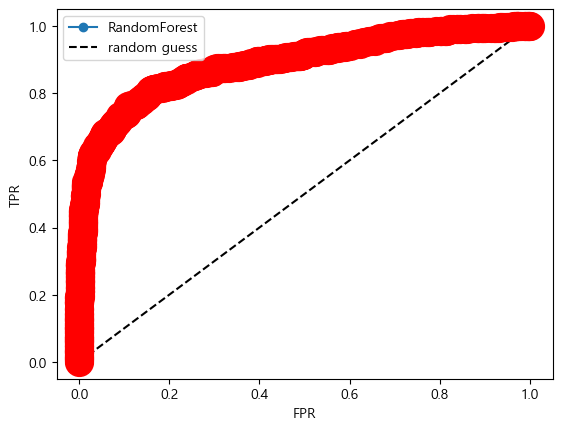

In [40]:
#ROC 커브
import matplotlib.pyplot as plt 
plt.plot(fpr, tpr, 'o-', label='RandomForest')
plt.plot([0,1],[0,1],'k--',label='random guess')
plt.plot([fpr], [tpr], 'ro', ms=20)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

#### 6. KNN (사례기반추론)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
train_rate = []
test_rate = []
neighbors = range(1, 11) 
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_scaled, y_train)
    train_rate.append(knn.score(X_train_scaled, y_train))
    test_rate.append(knn.score(X_test_scaled, y_test))
    test_arr=np.array(test_rate) 
    max_rate=np.max(test_arr) 
    idx=np.where(test_arr == max_rate)[0][0] 
    print("최적의 K :",neighbors[idx])
    print("최고 Score :",test_rate[idx])


In [ ]:
plt.rcParams["font.size"]=15
plt.plot(neighbors, train_rate, label="Train")
plt.plot(neighbors, test_rate, label="Test")
plt.title("KNN / mean_test_score")
plt.ylabel("Score")
plt.xlabel("이웃의 수")
plt.legend()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
score_tr=knn.score(X_train_scaled, y_train)
score_te=knn.score(X_test_scaled, y_test)
print("학습용:",score_tr)
print("검증용:",score_te)


result_tr.append(score_tr)
result_te.append(score_te)


#### 6.1 교차검증

In [ ]:
# 최적 요인 탐색
from sklearn.model_selection import GridSearchCV
params = {
'n_neighbors': list(range(1,11)),
'algorithm': ['ball_tree','kd_tree','brute'],
'weights': ['uniform','distance'],
'p': [1,2]
}
gcv = GridSearchCV(knn, params, cv=3)
gcv.fit(X, y)

In [ ]:
gcv.cv_results_["params"][:5]

In [ ]:
scores=gcv.cv_results_["mean_test_score"]
scores[:10]

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
print(max(scores))
plt.plot(scores)
plt.title("KNN / 교차검증") 
plt.ylabel("mean_test_score")

In [ ]:
# 최적 요인
print(gcv.best_score_)
print(gcv.best_params_) 
print(gcv.best_estimator_)

In [ ]:
# 최적 요인 적용 / 교차 검증 10회 
from sklearn.model_selection import cross_val_score
import numpy as np
model = KNeighborsClassifier(algorithm='ball_tree',
n_neighbors=6, p=2, weights='uniform')
result=cross_val_score(model, X, y, cv=10)

print(result)
print(np.mean(result))
print(np.max(result))

#### 7. SVM (서포트벡터머신)

In [ ]:
from sklearn.svm import SVC
svm = SVC(random_state=10)
svm.fit(X_train_scaled, y_train)
print("학습용:",svm.score(X_train_scaled, y_train))
print("검증용:",svm.score(X_test_scaled, y_test))

In [ ]:
# 최적 C value  , Gamma value 탐색
import numpy as np
train_rate = []
test_rate = []
c_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
g_values = [0.0001, 0.001, 0.01, 0.1]
for n in c_values:
    for g in g_values:
        svm = SVC(C=n,gamma=g,random_state=10)
        svm.fit(X_train_scaled, y_train)
        train_rate.append([n,g,svm.score(X_train_scaled,
        y_train)])
        test_rate.append([n,g,svm.score(X_test_scaled,
        y_test)])
        train_arr=np.array(train_rate) 
        test_arr=np.array(test_rate) 
        max_rate=np.max(test_arr[:,2])
        idx=np.argmax(test_arr[:,2]) 
        print("최적의 c:",test_rate[idx][0])
        print("최적의 gamma:",test_rate[idx][1])
        print("최고 정확도:",test_rate[idx][2])

In [ ]:
plt.rcParams["font.size"]=15
plt.plot(range(len(train_rate)), train_arr[:,2], label="Train")
plt.plot(range(len(test_rate)), test_arr[:,2], label="Test")
plt.legend()
plt.title("SVM / 정확도 그래프")
plt.ylabel("Score")

In [ ]:
# 최적 요인 적용
from sklearn.svm import SVC
svm = SVC(C=100,gamma=0.01,random_state=10)
svm.fit(X_train_scaled, y_train)
score_tr=svm.score(X_train_scaled, y_train)
score_te=svm.score(X_test_scaled, y_test)
print("학습용:",score_tr)
print("검증용:",score_te)

result_tr.append(score_tr)
result_te.append(score_te)

#### 8. Sklearn (인공신경망 / ANN)

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=1000, hidden_layer_sizes=[100,100], random_state=10)
mlp.fit(X_train_scaled, y_train)
score_tr=mlp.score(X_train_scaled, y_train)
score_te=mlp.score(X_test_scaled, y_test)
print("학습용:",score_tr)
print("검증용:",score_te)

result_tr.append(score_tr)
result_te.append(score_te)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
train_rate=[]
test_rate=[]
for i in range(100,301,100): 
    for j in range(100,301,100):
        model=MLPClassifier(random_state=0, hidden_layer_sizes=[i,j],max_iter=1000)
        model.fit(X_train_scaled,y_train)
        train_rate.append(model.score(X_train_scaled,y_train))
        test_rate.append(model.score(X_test_scaled,y_test))
plt.rcParams['font.size']=15
plt.plot(range(1,10),train_rate,label='Train')
plt.plot(range(1,10),test_rate,label='Test')
plt.title("ANN / 정확도 그래프") 
plt.ylabel('Accuracy')
plt.xlabel('count')
plt.legend()

In [ ]:
max_rate=max(test_rate) 
idx=np.where(test_rate == max_rate)[0][0]  
print('idx:',idx)
print('최고정확도:',max_rate)
cnt=0
for i in range(100,301,100):
    for j in range(100,301,100):
        if cnt == idx:
            print(i,j)
        cnt+=1
model=MLPClassifier(hidden_layer_sizes=[300,100],random_state=0)
model.fit(X_train_scaled,y_train)
print('학습용:{:6.2f}%'.format(model.score(X_train_scaled,y_train)*100))
print('검증용:{:6.2f}%'.format(model.score(X_test_scaled,y_test)*100))

#### 9. Tensorflow (딥러닝 / DNN)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
model = Sequential()
model.add(Dense(64,input_shape=(X.shape[1],),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid')) 
sgd = SGD(learning_rate=0.01)  
model.compile(loss='binary_crossentropy',            
optimizer='adam',
metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train_scaled, y_train, epochs=100)

In [ ]:
loss, acc_tr = model.evaluate(X_train_scaled,
y_train, verbose=0)
loss, acc_te = model.evaluate(X_test_scaled,
y_test, verbose=0)
print(acc_tr)
print(acc_te)


result_tr.append(acc_tr)
result_te.append(acc_te)

In [ ]:
result_tr

In [ ]:
result_te

#### 10. 정형 데이터 분류 비교

In [ ]:
methods=["LOGIT","Tree","RF","KNN","SVM", "ANN","DNN"]
result_tr_arr=np.array(result_tr) 
max_rate_tr=np.max(result_tr_arr) 
idx_tr=np.argmax(result_tr_arr) 
result_te_arr=np.array(result_te) 
max_rate_te=np.max(result_te_arr) 
idx_te=np.argmax(result_te_arr) 
print(methods)
print(result_tr)
print(result_te)
print("최적의 모형(학습용):",methods[idx_tr])
print("최고 정확도(학습용):",max_rate_tr)
print("최적의 모형(검증용):",methods[idx_te])
print("최고 정확도(검증용):",max_rate_te)
plt.rcParams["font.size"]=15
plt.plot(methods, result_tr_arr, label="Train")
plt.plot(methods, result_te_arr, label="Test")
plt.title("분류 모형별 Score")
plt.xlabel("분석방법")
plt.ylabel("Score")
plt.legend()

In [ ]:
methods=["LOGIT","Tree","RF","KNN","SVM","ANN" ,"DNN"]
scores_arr=np.array(result_tr) 
max_rate=np.max(result_tr_arr)
idx_tr=np.argmax(result_tr_arr) 
print(methods)
print(result_tr)
print("최적의 모형:",methods[idx_tr])
print("최고 정확도:",max_rate_tr)
plt.rcParams["font.size"]=15
plt.bar(methods, result_tr_arr)
plt.title("분류 모형별 정확도")
plt.xlabel("Classifier")
plt.ylabel("Accuracy")

#### 11.GridSearchCV

In [ ]:
#로짓
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
pipe = Pipeline([
('scaler', StandardScaler()),
('clf', LogisticRegression(random_state=0)),
])
params = {
'clf__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100],
}
grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X, y)
print(grid.best_params_)
print(grid.best_score_)

In [ ]:
scores = []

scores.append(grid.best_score_)
scores

In [ ]:
#Tree
from sklearn.tree import DecisionTreeClassifier
pipe = Pipeline([
('scaler', StandardScaler()),('clf', DecisionTreeClassifier(random_state=0)),
])
params = {
'clf__max_depth': list(range(3,6))
}
grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X, y)
print(grid.best_params_)
print(grid.best_score_)

In [ ]:
scores.append(grid.best_score_)
scores

In [ ]:
tree=grid.best_estimator_['clf']

In [ ]:
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from IPython.display import Image
dot_data = export_graphviz(tree, out_file=None,
feature_names=cols, class_names=["0","1"], filled=True,
rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
import numpy as np

def plot_tree(model):
    n_features = X.shape[1]
    plt.rcParams ["figure.figsize"]=(16,9)
    plt.barh(range(n_features), model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features), cols)
    plt.title ('Tree-Grid 특성 요인분석')
    plt.xlabel("importances")
    plt.ylabel("features")
    plt.ylim(-1, n_features)
plot_tree(tree)

In [ ]:
#RF
from sklearn.ensemble import RandomForestClassifier
pipe = Pipeline([
('scaler', StandardScaler()),
('clf', RandomForestClassifier(random_state=0)),
])
params = {
'clf__max_depth': list(range(3,6)),
'clf__n_estimators': list(range(10,110,10)),
}
grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X, y)
print(grid.best_params_)
print(grid.best_score_)

In [ ]:
scores.append(grid.best_score_)
scores

In [ ]:
rf=grid.best_estimator_['clf']
plot_tree(rf)

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
pipe = Pipeline([
('scaler', StandardScaler()),
('clf', KNeighborsClassifier()),
])
params = {
'clf__n_neighbors': list(range(1,11)),
}
grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X, y)
print(grid.best_params_)
print(grid.best_score_)

In [ ]:
scores.append(grid.best_score_)
scores

In [ ]:
#svm
from sklearn.svm import SVC
pipe = Pipeline([
('scaler', StandardScaler()),
('clf', SVC(random_state=0)),
])
params = {
'clf__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
'clf__gamma': [0.0001, 0.001, 0.01, 0.1],
}
grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X, y)
print(grid.best_params_)
print(grid.best_score_)

In [ ]:
scores.append(grid.best_score_)
scores

In [ ]:
#ANN
from sklearn.neural_network import MLPClassifier
pipe = Pipeline([
('scaler', StandardScaler()),
('clf', MLPClassifier(random_state=0, max_iter=5000)),
])
params = {
'clf__hidden_layer_sizes': [(50,), (100,), (50,50),
(100,100)],
'clf__activation': ['tanh', 'relu'],
'clf__alpha': [0.001, 0.01, 0.1]
}
grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X, y)
print(grid.best_params_)
print(grid.best_score_)

In [ ]:
scores.append(grid.best_score_)
scores

In [ ]:
#DNN
from scikeras.wrappers import KerasClassifier
from keras import models
from keras import layers
def create_network(optimizer="rmsprop"):
    network = models.Sequential()
    network.add(layers.Dense(units=16,
    activation="relu",
    input_shape=(X.shape[1],)))
    network.add(layers.Dense(units=16, activation="relu"))
    network.add(layers.Dense(units=1,
    activation="sigmoid"))
    network.compile(loss='binary_crossentropy',
    optimizer=optimizer, 
    metrics=["accuracy"])
    return network

In [ ]:

neural_network = KerasClassifier(model=create_network,
verbose=0)
pipe=Pipeline([
('scaler',StandardScaler()),
('clf',neural_network)
])
params={
'clf__epochs': [50, 100],
'clf__batch_size': [32,64,128],
'clf__optimizer': ["rmsprop", "adam"],
}
grid=GridSearchCV(pipe,params,scoring='accuracy',cv=3)
grid_result = grid.fit(X, y)

In [ ]:
grid.best_score_

In [ ]:
grid_result.best_params_

In [ ]:
scores.append(grid.best_score_)
scores

In [ ]:
methods=["LOGIT","Tree","RF","KNN","SVM","ANN","DNN"]
scores_arr=np.array(scores) 
max_rate=np.max(scores_arr)
idx=np.argmax(scores_arr) 
print(methods)
print(scores_arr)
print("최적의 모형:",methods[idx])
print("최고 정확도:",max_rate)
plt.rcParams["font.size"]=15
plt.bar(methods, scores_arr)
plt.title('GridSearchCV 적용 모형별 정확도' )
plt.xlabel("Classifier")
plt.ylabel("Accuracy")